# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/leaf.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 leaf.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [1]:
import numpy as np
import pandas as pd

In [2]:
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [3]:
train_count = train.shape[0]
test_count = test.shape[0]
total_count = train_count + test_count

print(f'Train set : {train_count} samples')
print(f'Test set  : {test_count} samples')
print(f'Total     : {total_count} samples')

Train set : 2244 samples
Test set  : 1496 samples
Total     : 3740 samples


In [4]:
train_counts = []
test_counts = []

for i in range(1, 41):
    train_count = train[train[:, 0] == i].shape[0]
    test_count = test[test[:, 0] == i].shape[0]

    train_counts.append(train_count)
    test_counts.append(test_count)

index = pd.Series(range(1, 41), name='Class')
pd.DataFrame({'Train set count': train_counts, 'Test set count': test_counts}, index=index)

,Train set count,Test set count
Class,,
1,77,55
2,66,44
3,55,55
4,66,22
5,77,55
6,44,44
7,44,66
8,33,88
9,121,33


- Znaleziony problem: niektóre klasy nie są reprezentowane w zbiorze danych

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [5]:
train_new = train[(train[:, 0] == 3) | (train[:, 0] == 5)]
test_new = test[(test[:, 0] == 3) | (test[:, 0] == 5)]

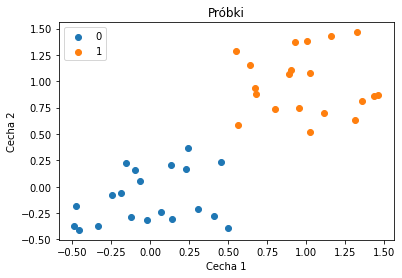### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
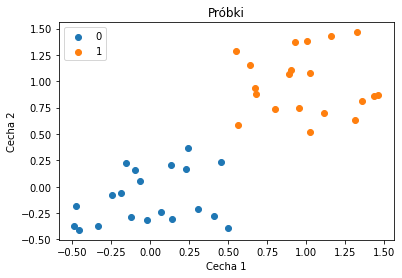

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

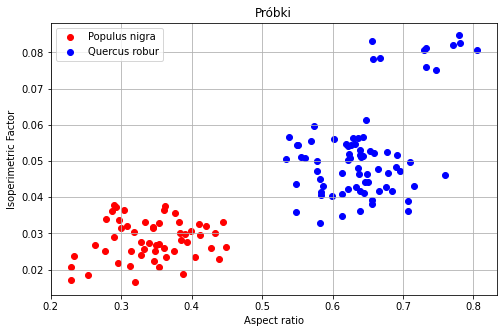

In [6]:
import matplotlib.pyplot as plt
import numpy as np

train_new_3 = train_new[train_new[:, 0] == 3]
train_new_5 = train_new[train_new[:, 0] == 5]

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(train_new_3[:, 4], train_new_3[:, 8], c='r', label='Populus nigra')
ax.scatter(train_new_5[:, 4], train_new_5[:, 8], c='b', label='Quercus robur')

ax.grid()
ax.set_xlabel('Aspect ratio')
ax.set_ylabel('Isoperimetric Factor')
ax.set_title('Próbki')
ax.legend()

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `p1` oraz `p2` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [7]:
import math

features = [1, 2] # kolumny o indeksach 1, 2
p1 = np.array([0, 2, 3])
p2 = np.array([0, 5, 6])

def edist(p1, p2, features):
    f1 = p1[features]
    f2 = p2[features]
    dist = math.sqrt(sum([(x - y)**2 for x, y in zip(f1, f2)]))
    return dist

edist(p1, p2, features) # 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [ ]:
def nn_classifier(data, features, sample):
    distances = np.array([edist(x, sample, features) for x in data])
    neares_index = np.argmin(distances)
    class_ = data[neares_index][0]
    return class_

nn_classifier(train_new, [4, 8], test_new[0])

3.0

### Zadanie 7
Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

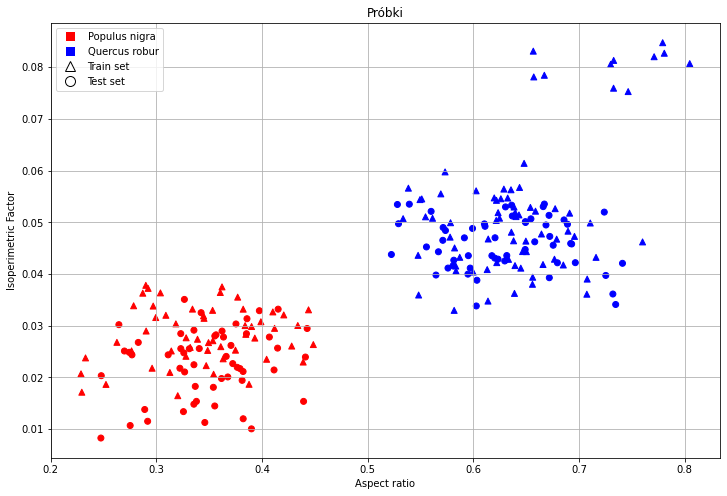

In [ ]:
from matplotlib.lines import Line2D

coloring = {
    3: 'red',
    5: 'blue',
}

fig, ax = plt.subplots(figsize=(12, 8))
plt.sca(ax)

for data, marker in [(train_new, '^'), (test_new, 'o')]:
    for class_ in [3, 5]:
        data_class = data[data[:, 0] == class_]
        predictions = [nn_classifier(train_new, [4, 8], sample) for sample in data_class]
        c = [coloring[e] for e in data_class[:,0]]
        edge = [coloring[e] for e in predictions]
        ax.scatter(
            data_class[:, 4], 
            data_class[:, 8], 
            marker=marker, 
            facecolor=c, 
            edgecolors=edge,
        )

ax.grid()
ax.set_xlabel('Aspect ratio')
ax.set_ylabel('Isoperimetric Factor')
ax.set_title('Próbki')

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', label='Populus nigra', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', label='Quercus robur', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='w', markeredgecolor='black', label='Train set', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='black', label='Test set', markersize=10),
]
ax.legend(handles=legend_elements);

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [25]:
features = [4, 8]
predictions = [nn_classifier(train_new, features, sample) for sample in test_new]
matches = [a == b for a, b in zip(predictions, test_new[:, 0])]
acc = sum(matches) / len(matches)
print('Accuracy:', acc)

Accuracy: 1.0


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty doku w wkleić w komórkę poniżej zmieniając liczbę klas.

In [26]:
train_new_2 = train[(train[:, 0] == 3) | (train[:, 0] == 5) | (train[:, 0] == 9) | (train[:, 0] == 29) | (train[:, 0] == 35)]
test_new_2 = test[(test[:, 0] == 3) | (test[:, 0] == 5) | (test[:, 0] == 9) | (test[:, 0] == 29) | (test[:, 0] == 35)]

predictions = [nn_classifier(train_new_2, [4, 8], sample) for sample in test_new_2]
matches = [a == b for a, b in zip(predictions, test_new_2[:, 0])]
acc = sum(matches) / len(matches)
print('Accuracy:', acc)

Accuracy: 0.5606060606060606


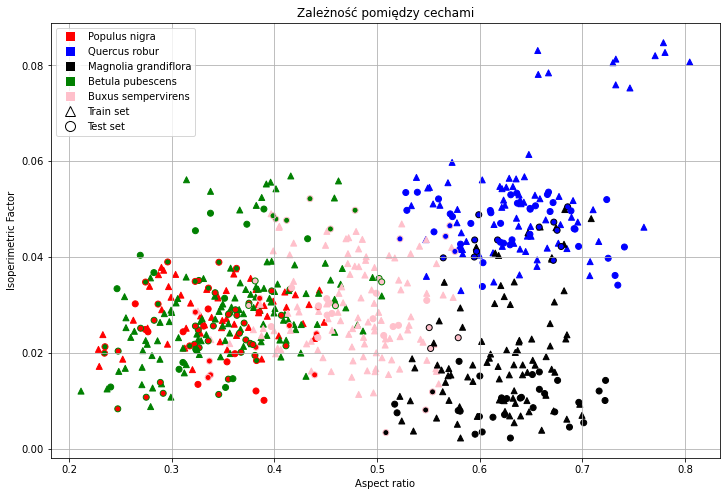

In [27]:
from matplotlib.lines import Line2D

coloring = {
    3: 'red',
    5: 'blue',
    9: 'green',
    29: 'pink',
    35: 'black',
}

fig, ax = plt.subplots(figsize=(12, 8))

for data, marker in [(train_new_2, '^'), (test_new_2, 'o')]:
    for class_ in [3, 5, 9, 29, 35]:
        data_class = data[data[:, 0] == class_]
        predictions = [nn_classifier(train_new_2, [4, 8], sample) for sample in data_class]
        c = [coloring[e] for e in data_class[:,0]]
        edge = [coloring[e] for e in predictions]
        ax.scatter(
            data_class[:, 4], 
            data_class[:, 8], 
            marker=marker, 
            facecolor=c, 
            edgecolors=edge,
            label=f'Zbiór'
        )

ax.grid()
ax.set_xlabel('Aspect ratio')
ax.set_ylabel('Isoperimetric Factor')
ax.set_title('Zależność pomiędzy cechami');

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', label='Populus nigra', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', label='Quercus robur', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='black', label='Magnolia grandiflora', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', label='Betula pubescens', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='pink', label='Buxus sempervirens', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='w', markeredgecolor='black', label='Train set', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='black', label='Test set', markersize=10),
]
ax.legend(handles=legend_elements);

### Zadanie 10

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [20]:
train_new_3 = train[(train[:, 0] == 3) | (train[:, 0] == 5) | (train[:, 0] == 9) | (train[:, 0] == 29) | (train[:, 0] == 35)]
test_new_3 = test[(test[:, 0] == 3) | (test[:, 0] == 5) | (test[:, 0] == 9) | (test[:, 0] == 29) | (test[:, 0] == 35)]

predictions = [nn_classifier(train_new_3, range(2, 16), sample) for sample in test_new_3]
matches = [a == b for a, b in zip(predictions, test_new_3[:, 0])]
acc = sum(matches) / len(matches)
print('Accuracy:', acc)

Accuracy: 0.7626262626262627


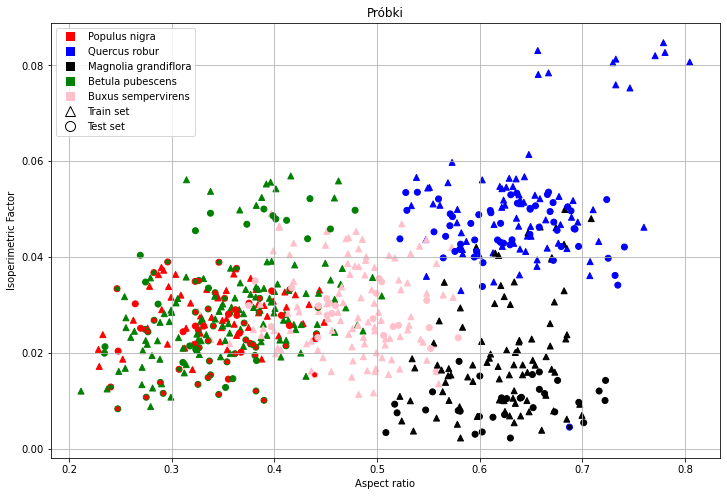

In [22]:
coloring = {
    3: 'red',
    5: 'blue',
    9: 'green',
    29: 'pink',
    35: 'black',
}

fig, ax = plt.subplots(figsize=(12, 8))

for data, marker in [(train_new_3, '^'), (test_new_3, 'o')]:
    for class_ in [3, 5, 9, 29, 35]:
        data_class = data[data[:, 0] == class_]
        predictions = [nn_classifier(train_new_3, range(2, 16), sample) for sample in data_class]
        c = [coloring[row[0]] for row in data_class]
        edge = [coloring[e] for e in predictions]
        ax.scatter(
            data_class[:, 4], 
            data_class[:, 8], 
            marker=marker, 
            facecolor=c, 
            edgecolors=edge,
            label=f'Zbiór'
        )

ax.grid()
ax.set_xlabel('Aspect ratio')
ax.set_ylabel('Isoperimetric Factor')
ax.set_title('Próbki');

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', label='Populus nigra', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', label='Quercus robur', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='black', label='Magnolia grandiflora', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', label='Betula pubescens', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='pink', label='Buxus sempervirens', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='w', markeredgecolor='black', label='Train set', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markeredgecolor='black', label='Test set', markersize=10),
]
ax.legend(handles=legend_elements);

### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

- Gdy cechy wyraźnie się różnią to klasyfikator może działać nawet bezbłędnie
- Klasyfikator działa lepiej gdy wykorzystuje więcej cech
- Im więcej klas ma odróżniać klasyfikator tym częściej się myli